***Welcome to Medical image processing in Python***<br/>

Presented by: Reza Saadatyar (2024-2025) <br/>
E-mail: Reza.Saadatyar@outlook.com 

**1️⃣ Importing the dataset**<br/>
**2️⃣ Convert the images into array & masks to boolean**<br/>
**3️⃣ RGB to gray**<br/>
**4️⃣ [Image Resizing](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.resize)**<br/>
**5️⃣ Augmentation**<br/>
**6️⃣ Mask-Based Image Cropping**<br/>


*Image-Width: n*<br/>
*Image-Height: m*<br/>
*Channels: c*<br/>
*Planes: p*<br/>
*Grayscale: (p, m, n)*<br/>
*RGB: (p, m, n, c)*<br/>

<font color='#FF000e' size="4.8" face="Arial"><b>Importing libraries</b></font>

In [1]:
import numpy as np
from colorama import Fore
import matplotlib.pyplot as plt

# from skimage.viewer import ImageViewer

from Functions.filepath_extractor import FilePathExtractor
from Functions.image_processor import ImageProcessor

<font color=#070bee size="4.5" face="Arial"><b>1️⃣ Importing the dataset</b></font>

In [6]:
# ================================================ Inputs ======================================================
directory_path = "D:/Medical-Image-Processing/Data/Inputs"

# Create an instance of DirectoryReader with the directory path and file format
obj_inputs = FilePathExtractor(directory_path, format_type="tif")
inputs_filesname = obj_inputs.filesname         # List of filesname in the directory with the specified extension
folders = obj_inputs.folders_path               # List of folders path where the files are located
files_path = obj_inputs.all_files_path          # List of full files path for the files
subfoldersname = obj_inputs.subfoldersname      # List of subfolders name within the directory

print(Fore.GREEN + f"{inputs_filesname = }""\n" + Fore.BLUE + f"{folders = }""\n" + Fore.MAGENTA + f"{files_path = }"+
      "\n" + Fore.CYAN + f"{subfoldersname = }")

inputs_filesname = ['ytma10_010704_benign1_ccd.tif', 'ytma10_010704_benign2_ccd.tif', 'ytma10_010704_benign3_ccd.tif', 'ytma10_010704_malignant1_ccd.tif', 'ytma10_010704_malignant2_ccd.tif', 'ytma10_010704_malignant3_ccd.tif', 'ytma12_010804_benign1_ccd.tif', 'ytma12_010804_benign2_ccd.tif', 'ytma12_010804_benign3_ccd.tif', 'ytma12_010804_malignant1_ccd.tif', 'ytma12_010804_malignant2_ccd.tif', 'ytma12_010804_malignant3_ccd.tif', 'ytma23_022103_benign1_ccd.tif', 'ytma23_022103_benign2_ccd.tif', 'ytma23_022103_benign3_ccd.tif', 'ytma23_022103_malignant1_ccd.tif', 'ytma23_022103_malignant2_ccd.tif', 'ytma23_022103_malignant3_ccd.tif', 'ytma49_042003_benign1_ccd.tif', 'ytma49_042003_benign2_ccd.tif', 'ytma49_042003_benign3_ccd.tif', 'ytma49_042003_malignant1_ccd.tif', 'ytma49_042003_malignant2_ccd.tif', 'ytma49_042003_malignant3_ccd.tif', 'ytma49_042203_benign1_ccd.tif', 'ytma49_042203_benign2_ccd.tif', 'ytma49_042203_benign3_ccd.tif', 'ytma49_042203_malignant1_ccd.tif', 'ytma49_042203_ma

In [5]:
# ==================================================== Masks ===================================================
directory_path = "D:/Medical-Image-Processing/Data/Masks/"

# Create an instance of DirectoryReader with the directory path and file format
obj_masks = FilePathExtractor(directory_path, format_type="TIF")
masks_filesname = obj_masks.filesname      # List of filesname in the directory with the specified extension
folders = obj_masks.folders_path           # List of folders path where the files are located
files_path = obj_masks.all_files_path      # List of full files path for the files
subfoldersname = obj_masks.subfoldersname  # List of subfolders name within the directory

print(Fore.GREEN + f"{masks_filesname = }""\n" + Fore.BLUE + f"{folders = }""\n" + Fore.MAGENTA + f"{files_path = }"+
      "\n" + Fore.CYAN + f"{subfoldersname = }")

masks_filesname = ['ytma10_010704_benign1.TIF', 'ytma10_010704_benign2.TIF', 'ytma10_010704_benign3.TIF', 'ytma10_010704_malignant1.TIF', 'ytma10_010704_malignant2.TIF', 'ytma10_010704_malignant3.TIF', 'ytma12_010804_benign1.TIF', 'ytma12_010804_benign2.TIF', 'ytma12_010804_benign3.TIF', 'ytma12_010804_malignant1.TIF', 'ytma12_010804_malignant2.TIF', 'ytma12_010804_malignant3.TIF', 'ytma23_022103_benign1.TIF', 'ytma23_022103_benign2.TIF', 'ytma23_022103_benign3.TIF', 'ytma23_022103_malignant1.TIF', 'ytma23_022103_malignant2.TIF', 'ytma23_022103_malignant3.TIF', 'ytma49_042003_benign1.TIF', 'ytma49_042003_benign2.TIF', 'ytma49_042003_benign3.TIF', 'ytma49_042003_malignant1.TIF', 'ytma49_042003_malignant2.TIF', 'ytma49_042003_malignant3.TIF', 'ytma49_042203_benign1.TIF', 'ytma49_042203_benign2.TIF', 'ytma49_042203_benign3.TIF', 'ytma49_042203_malignant1.TIF', 'ytma49_042203_malignant2.TIF', 'ytma49_042203_malignant3.TIF', 'ytma49_042403_benign1.TIF', 'ytma49_042403_benign2.TIF', 'ytma49_

In [ ]:
# Check of the Images
inputs_format_type = "_ccd.tif"
mask_format_type = ".TIF"
[i.split(inputs_format_type)[0] for i in inputs_filesname] == [i.split(mask_format_type)[0] for i in masks_filesname]

True

<font color=#09eb14 size="4.5" face="Arial"><b> 2️⃣ Convert the images into array</b></font>

In [16]:
# ================================================ Inputs ======================================================
directory_path = "D:/Medical-Image-Processing/Data/Inputs"
obj = ImageProcessor()
inputs = obj.imgs_to_ndarray(directory_path, format_type="tif")
print(Fore.GREEN + f"{inputs.shape = }")

inputs.shape = (58, 768, 896, 3)


In [15]:
# ==================================================== Masks ===================================================
directory_path = "D:/Medical-Image-Processing/Data/Masks/"
obj = ImageProcessor()
masks = obj.imgs_to_ndarray(directory_path, format_type="TIF")
print(Fore.GREEN + f"{masks.shape = }")

masks.shape = (58, 768, 896)


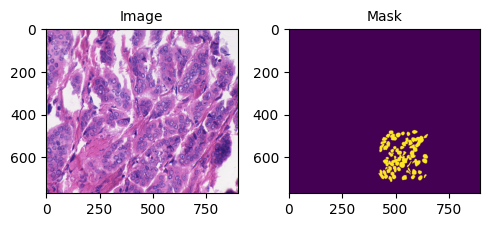

In [12]:
ind = 5
plt.figure(figsize=(5, 3))
plt.subplot(121); plt.imshow(inputs[ind]); plt.title('Image', fontsize=10)
plt.subplot(122); plt.imshow(masks[ind]); plt.title('Mask', fontsize=10) 
plt.tight_layout()

<font color=#09eb14 size="4.5" face="Arial"><b> 2️⃣ Masks to boolean</b></font>

masks_boolean.shape = (58, 768, 896, 2)


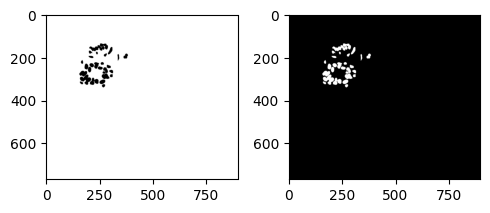

In [14]:
directory_path = "D:/Medical-Image-Processing/Data/Masks/"
masks_boolean = obj.masks_to_boolean(directory_path, format_type="TIF")
print(Fore.GREEN + f"{masks_boolean.shape = }")

plt.figure(figsize=(5, 3))
plt.subplot(121); plt.imshow(masks_boolean[0, :, :, 0], cmap="gray")
plt.subplot(122); plt.imshow(masks_boolean[0, :, :, 1], cmap="gray")
plt.tight_layout()

<font color=#dd7f05 size="4.5" face="Arial"><b>3️⃣ RGB to Gray</b></font>

In [13]:
directory_path = "D:/Medical-Image-Processing/Data/Inputs/"
save_path = 'D:/Medical-Image-Processing/Data/'
img_gray = obj.rgb_to_gray(directory_path, save_path, format_type="tif", save_img_gray="on")

The images have been saved successfully.


<font color=#ec0995 size="4.5" face="Arial"><b>4️⃣ Image Resizing</b></font><br/>
**`Standardizing Image Dimensions:`** Machine learning models, like CNNs, need input data with fixed dimensions. For instance, if a model requires images of size 224x224x3, all input images must be resized to that shape.<br/>
**`Reducing Computational Load:`** Resizing images to smaller dimensions lowers computational costs, particularly with large datasets, and aids in faster training or inference for deep learning models.

In [17]:
# Call the `resize_images` method to resize the images to the target dimensions (255x255)
resized_images = obj.resize_images(inputs, img_height_resized=255, img_width_resized=255)  # Resize all images to 255x255
print(Fore.GREEN + f"Resizing images from {inputs.shape} to {resized_images.shape}")

Resizing images from (58, 768, 896, 3) to (58, 255, 255, 3)


<font color=#06defa size="4.5" face="Arial"><b>5️⃣ Augmentation</b></font><br/>
**Purpose:**<br/>
- `Increase Dataset Size:` Augmentation creates new training samples from existing ones, effectively increasing the dataset size.<br/>
- `Improve Model Robustness:` Introducing variations such as rotations, flips, and zooms helps the model adapt more effectively to real-world scenarios.<br/>
- `Prevent Overfitting:` Augmentation enhances variability, minimizing the likelihood of the model overfitting to the training data.<br/>

**Augmentation Techniques:**<br/>
- `Rotation:` Rotating images by a specified degree range (e.g., rotation_range=30).<br/>
- `Flip:` Flipping images horizontally or vertically.<br/>
- `Zoom:` Zooming in or out of images.<br/>
- `Shift:` Translating images horizontally or vertically.<br/>
- `Brightness/Contrast Adjustment:` Changing the brightness or contrast of images.<br/>
- `Noise Addition:` Adding random noise to images.<br/>

In [62]:
rotation_range = 30
num_augmented_imag = 3
# Path to the folder containing the original images
file_path = 'D:/Medical-Image-Processing/Data/Inputs/'

# Path where augmented images will be saved
augmente_path = 'D:/Medical-Image-Processing/Data/'

obj.augmentation(file_path, augmente_path, num_augmented_imag, rotation_range, format_type="tif")

Found 58 images belonging to 1 classes.


<font color=#ecde11 size="4.5" face="Arial"><b>6️⃣ Mask-Based Image Cropping</b></font><br/>
For each image and mask, the foreground coordinates of the mask (where mask equals 255) are identified. A bounding box is determined from these coordinates, and both the image and mask are cropped accordingly. They are then resized to their original dimensions.

In [21]:
data_format_type = '_ccd.tif'
mask_format_type = '.TIF'
data_path = "D:/Medical-Image-Processing/Data/Inputs/"
masks_path = "D:/Medical-Image-Processing/Data/Masks/"

cropped_imgs, cropped_masks = obj.mask_based_image_cropping(data_path, masks_path, data_format_type, mask_format_type)

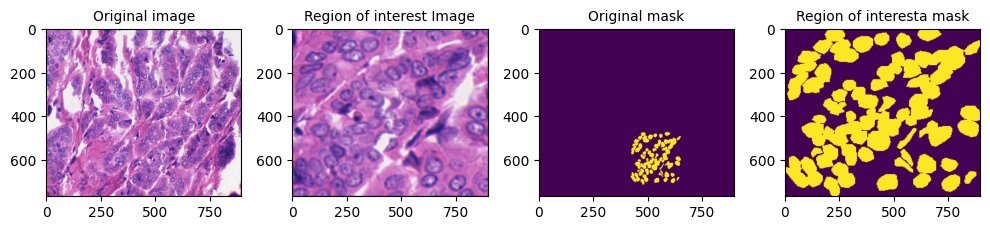

In [24]:
ind = 5
plt.figure(figsize=(10, 5))
plt.subplot(141); plt.imshow(inputs[ind]); plt.title('Original image', fontsize=10)
plt.subplot(142); plt.imshow(cropped_imgs[ind]); plt.title('Region of interest Image', fontsize=10)
plt.subplot(143); plt.imshow(masks[ind]); plt.title('Original mask', fontsize=10)
plt.subplot(144); plt.imshow(cropped_masks[ind]); plt.title('Region of interesta mask', fontsize=10) 
plt.tight_layout()

In [22]:
cropped_imgs.shape, cropped_masks.shape

((58, 768, 896, 3), (58, 768, 896))

In [22]:
np.expand_dims(masks_cropped, axis=3).shape

(58, 768, 896, 1)

In [54]:
imgs_cropped[0][0][2].shape

(3,)

In [60]:
imgs_cropped[0][0:20,1]

array([[137, 130, 136],
       [194, 184, 193],
       [217, 205, 215],
       [218, 206, 215],
       [218, 206, 216],
       [219, 207, 216],
       [220, 208, 216],
       [220, 209, 216],
       [221, 209, 215],
       [222, 210, 215],
       [221, 210, 215],
       [221, 209, 216],
       [220, 209, 217],
       [220, 208, 217],
       [219, 208, 217],
       [219, 207, 217],
       [218, 206, 217],
       [218, 205, 216],
       [217, 203, 216],
       [216, 201, 216]], dtype=uint8)

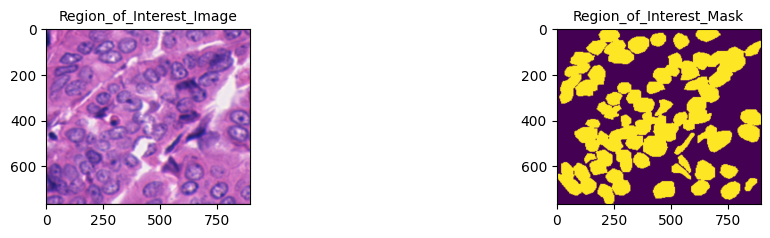

In [23]:
ind = 5
plt.figure(figsize=(10, 5))
# plt.subplot(141); plt.imshow(imgs[ind]); plt.title('Original_Image', fontsize=10)
plt.subplot(142); plt.imshow(imgs_cropped[ind]); plt.title('Region_of_Interest_Image', fontsize=10)
# plt.subplot(143); plt.imshow(masks[ind]); plt.title('Original_Mask', fontsize=10)
plt.subplot(144); plt.imshow(masks_cropped[ind]); plt.title('Region_of_Interest_Mask', fontsize=10) 
plt.tight_layout()

In [22]:

from skimage import io, transform

data_format_type = '_ccd.tif'
mask_format_type = '.TIF'
img_height_resize, img_width_resize = 768, 896
data_path = "D:/Medical-Image-Processing/Inputs/"
masks_path = "D:/Medical-Image-Processing/Masks/"
# Create an instance of DirectoryReader with the directory path and file format
obj_data = FilePathExtractor(data_path, format_type=data_format_type)
obj_masks = FilePathExtractor(masks_path, format_type=mask_format_type)
data_filesname = sorted(obj_data.filesname)
data_filespath = sorted(obj_data.all_files_path)
masks_filesname = sorted(obj_masks.filesname)
masks_filespath = sorted(obj_masks.all_files_path)

[i.split(data_format_type)[0] for i in data_filesname] == [i.split(mask_format_type)[0] for i in masks_filesname]

first_img_shape = io.imread(data_filespath[0]).shape
imgs = np.zeros((len(data_filesname), *first_img_shape), dtype=np.uint8)
imgs_cropped = np.zeros_like(imgs)

first_mask_shape = io.imread(masks_filespath[0]).shape
masks = np.zeros((len(data_filesname), *first_mask_shape), dtype=bool)
masks_cropped = np.zeros((len(data_filesname), *first_mask_shape, 1), dtype=bool)

for ind, val in enumerate(data_filespath):
    
    img = io.imread(val)
    mask = io.imread(masks_filespath[ind])
    
    y_coord, x_coord = np.where(mask==255)
    y_min = min(y_coord)
    y_max = max(y_coord)
    x_min = min(x_coord)
    x_max = max(x_coord)
    
    cropped_image = img[y_min:y_max, x_min:x_max]
    cropped_mask = mask[y_min:y_max, x_min:x_max]
    
    imgs_cropped[ind] = transform.resize(cropped_image[:, :, :first_img_shape[-1]],
            (img_height_resize, img_width_resize, first_img_shape[-1]),
            mode='constant',
            anti_aliasing=True,
            preserve_range=True)
    
    masks_cropped[ind] = np.expand_dims(transform.resize(cropped_mask, 
            (img_height_resize, img_width_resize),
            mode='constant',
            anti_aliasing=True,
            preserve_range=True), axis=-1)
    imgs[ind] = img
    masks[ind] = mask 
    

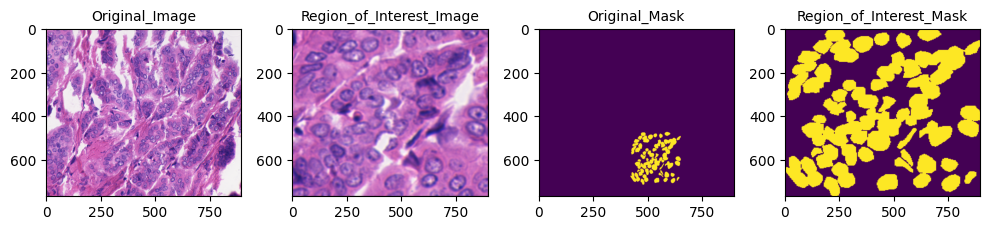

In [23]:
ind = 5
plt.figure(figsize=(10, 5))
plt.subplot(141); plt.imshow(imgs[ind]); plt.title('Original_Image', fontsize=10)
plt.subplot(142); plt.imshow(imgs_cropped[ind]); plt.title('Region_of_Interest_Image', fontsize=10)
plt.subplot(143); plt.imshow(masks[ind]); plt.title('Original_Mask', fontsize=10)
plt.subplot(144); plt.imshow(masks_cropped[ind]); plt.title('Region_of_Interest_Mask', fontsize=10) 
plt.tight_layout()

In [159]:
imgs.shape, imgs_cropped.shape, masks.shape, masks_cropped.shape

((58, 768, 896, 3), (58, 768, 896, 3), (58, 768, 896), (58, 768, 896, 1))

- Zero Padding
  - `Preserve Dimensions:` Zero padding retains the original dimensions of the input tensor during convolution, which is important for tasks like image segmentation.
  - `Control Output Size:` Zero padding ensures the output tensor size matches desired dimensions, especially in U-Net architectures where input and output sizes must align.
  - `Avoid Information Loss:` Pixels near the edges are involved in fewer convolutions than central pixels, leading to potential information loss. Padding ensures every pixel is treated equally.
  - `Better Performance:` By maintaining the spatial dimensions, zero padding helps the network extract features effectively, especially for deeper layers.
  - Types of Padding
    - `Valid Padding:` No padding is applied; the output size decreases.
    - `Same Padding:` Zero padding is applied to maintain the same dimensions between input and output.
- `Filter`: A filter (or kernel) is a small matrix that slides over input data to perform convolution, extracting features like edges, textures, and patterns (e.g., A 3x3 filter would have 9 weights).
- `Stride` is the step size by which the filter or kernel moves across the input during convolution or pooling operations.
  - *A stride of 1* moves the filter by one pixel at a time, resulting in a larger output.
  - *A stride of 2* skips every alternate pixel, reducing the output size.
  - $\text{Output Size} =  \large \frac{\text{Input Size} - \text{Filter Size} + 2 \times \text{Padding}}{\text{Stride}} + 1$
    - Input Size (L) = 32
    - Filter Size (K) = 3
    - Padding (P), (P=0,valid padding)
    - Stride (S) = 1
    - $\text{Output Size} = \frac{32 - 3 + 2 \times 1}{1} + 1 = \frac{30 + 2}{1} + 1 = 32$
- `Pooling` reduces the spatial dimensions of the feature map, lowering computational complexity and capturing dominant features.
   - Max Pooling: 2×2 window, [1, 3; 2, 4] → 4.
   - Average Pooling: 2×2 window, [1, 3; 2, 4] → 2.5.
- `Upsampling` increases feature map dimensions, used in image segmentation and super-resolution. Methods include Nearest Neighbor Upsampling, which fills new positions with the nearest pixel value, and Bilinear Interpolation, which uses weighted averages for smoother outputs.
- `Unpooling` Unpooling reverses pooling to restore feature map resolution, used in image reconstruction or segmentation. Max unpooling replaces max values from pooling in original positions, filling others with zeros.

In [33]:
# 5. Implementation of U_NET Model for Semantic Segmentation

from tensorflow.keras import layers, models, callbacks
_, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = imgs.shape

def U_Net_Segmentation(input_size=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)):
    
    
    inputs = layers.Input(input_size)
    n = layers.Lambda(lambda x:x/255)(inputs)
    
    c1 = layers.Conv2D(16, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(n)
    c1 = layers.Dropout(0.1)(c1)
    c1 = layers.Conv2D(16, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(c1)
    p1 = layers.MaxPooling2D((2,2))(c1)

    c2 = layers.Conv2D(32, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(p1)
    c2 = layers.Dropout(0.1)(c2)
    c2 = layers.Conv2D(32, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(c2)
    p2 = layers.MaxPooling2D((2,2))(c2)


    c3 = layers.Conv2D(64, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(p2)
    c3 = layers.Dropout(0.2)(c3)
    c3 = layers.Conv2D(64, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(c3)
    p3 = layers.MaxPooling2D((2,2))(c3)


    c4 = layers.Conv2D(128, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(p3)
    c4 = layers.Dropout(0.2)(c4)
    c4 = layers.Conv2D(128, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(c4)
    p4 = layers.MaxPooling2D((2,2))(c4)


    c5 = layers.Conv2D(256, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(p4)
    c5 = layers.Dropout(0.3)(c5)
    c5 = layers.Conv2D(256, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(c5)


    u6 = layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(128, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(u6)
    c6 = layers.Dropout(0.2)(c6)
    c6 = layers.Conv2D(128, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(c6)   

    u7 = layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(64, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(u7)
    c7 = layers.Dropout(0.2)(c7)
    c7 = layers.Conv2D(64, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(c7) 

    u8 = layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(32, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(u8)
    c8 = layers.Dropout(0.1)(c8)
    c8 = layers.Conv2D(32, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(c8) 
    
    
    u9 = layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis = 3)
    c9 = layers.Conv2D(16, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(u9)
    c9 = layers.Dropout(0.1)(c9)
    c9 = layers.Conv2D(16, (3,3), activation='elu', kernel_initializer='he_normal',
                padding='same')(c9) 
    
    outputs = layers.Conv2D(1,(1,1), activation='sigmoid')(c9)
    
    model = models.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', 
                  metrics=['accuracy'])
    # model.summary()
    return model

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

# 6. Define U_NET Model Evaluator (Intersection Over Union _ IOU)
# def Mean_IOU_Evaluator(y_true, y_pred):
#     prec = []

#     # Loop over thresholds from 0.5 to 0.95 (step of 0.05)
#     for t in np.arange(0.5, 1, 0.05):
#         # Update deprecated functions
#         y_pred_ = tf.cast(y_pred > t, tf.int32)  # Replace tf.to_int32 with tf.cast
#         metric = tf.keras.metrics.MeanIoU(num_classes=2)  # Updated MeanIoU usage
#         metric.update_state(y_true, y_pred_)
#         prec.append(metric.result())  # Append IOU result for the threshold

#     # Return the mean IOU across all thresholds
#     return K.mean(K.stack(prec), axis=0)
model = U_Net_Segmentation()

# def Mean_IOU_Evaluator(y_true, y_pred):
#     prec = []
#     metric = tf.keras.metrics.MeanIoU(num_classes=2)  # Create the metric instance outside the loop

#     # Loop over thresholds from 0.5 to 0.95 (step of 0.05)
#     for t in np.arange(0.5, 1, 0.05):
#         y_pred_ = tf.cast(y_pred > t, tf.int32)  # Apply threshold
        
#         # Reset the internal variables of MeanIoU
#         metric.update_state([], [])  # Workaround to clear previous state

#         metric.update_state(y_true, y_pred_)
#         prec.append(metric.result().numpy())  # Append IOU result for the threshold

#     # Return the mean IOU across all thresholds
#     return K.mean(K.stack(prec), axis=0)


In [ ]:
# # 6. Define U_NET Model Evaluator (Intersection Over Union _ IOU)
# from tensorflow.keras import backend as k
# def Mean_IOU_Evaluator(y_true, y_pred):
    
#     prec = []
    
#     for t in np.arange(0.5, 1, 0.05):
        
#         # y_pred_ = tf.to_int32(y_pred>t)
#         y_pred_ = tf.cast(y_pred > t, tf.int32)  # Replace tf.to_int32 with tf.cast
#         score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
#         k.get_session().run(tf.local_variables_initializer())
#         with tf.control_dependencies([up_opt]):
#             score = tf.identity(score)
#         prec.append(score)
#     return k.mean(k.stack(prec), axis = 0)

# model = U_Net_Segmentation()

In [ ]:
imageset = 'BCC'
backbone = 'UNET'
version = 'v1.0'

# Correct file path to end with .keras
model_keras = 'model-{imageset}-{backbone}-{version}.keras'.format(
    imageset=imageset, backbone=backbone, version=version
)

# Callbacks
earlystopper = callbacks.EarlyStopping(patience=7, verbose=1)
checkpointer = callbacks.ModelCheckpoint(
    filepath=model_keras,  # Use the correct file path ending with .keras
    verbose=1,
    save_best_only=True
)

In [ ]:
# 7. Show The Results per Epoch

class loss_history(keras.callbacks.Callback):
    
    def __init__ (self, x=4):
        self.x = x
        
    def on_epoch_begin(self, epoch, logs={}):
        
        io.imshow(Train_X[self.x])
        plt.show()
        
        io.imshow(np.squeeze(Train_Y[self.x]))
        plt.show()
        
        preds_train = self.model.predict(np.expand_dims(Train_X[self.x], axis = 0))
        io.imshow(np.squeeze(preds_train[0]))
        plt.show()


In [ ]:

history = model.fit(imgs_cropped, masks_cropped,
                    validation_split=0.1,
                    batch_size=2,
                    epochs=5)


Epoch 1/5


c:\Users\rsaad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_88']
Received: inputs=Tensor(shape=(2, 768, 896, 3))
  warnings.warn(msg)


 4/26 ━━━━━━━━━━━━━━━━━━━━ 4:16 12s/step - accuracy: 0.5368 - loss: 0.8559

In [ ]:
# 7. Show The Results per Epoch

class loss_history(callbacks.Callback):

    def __init__ (self, x=4):
        self.x = x
    
    def on_epoch_begin(self, epoch, logs=None):
        
        io.imshow(Train_X[self.x])
        plt.show()
        
        io.imshow(np.squeeze(Train_Y[self.x]))
        plt.show()
        
        preds_train = self.model.predict(np.expand_dims(Train_X[self.x], axis = 0))
        io.imshow(np.squeeze(preds_train[0]))
        plt.show()

In [ ]:
# 8. Train U_NET Model using Training Samples

results = model.fit(Train_X, Train_Y, 
                    validation_split=0.1, 
                    batch_size=2,
                    epochs=20,
                    callbacks=[earlystopper, checkpointer, loss_history()]
                    )

In [ ]:
# def plot_img_original_augment(self, num_img: int) -> None:
        
#         _, axs = plt.subplots(nrows=2, ncols=num_img)
#          # Check if num_img is 1 (special case for 1 image)
#         if num_img == 1:
#             # Display images on the first row
#             # io.imread(files_inputs[0])[:, :, :3].shape
#             axs[0].imshow(io.imread(glob.glob(self.file_path + '/*')[0]), cmap='gray')
#             axs[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Hide ticks
#             [spine.set_visible(False) for spine in axs[0].spines.values()]  # Hide all spines
#             axs[0].set_ylabel("Original Images", fontsize=12, labelpad=10)  # Y-axis label for the first row
            
#             # Display images on the second row
#             axs[1].imshow(io.imread(glob.glob(self.ugmente_path + '/*')[0]), cmap='gray')
#             axs[1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Hide ticks
#             [spine.set_visible(False) for spine in axs[1].spines.values()]  # Hide all spines
            # axs[1].set_ylabel("Augmented Images", fontsize=12, labelpad=10)  # Y-axis label for the second row

    #     else:
    #         for i in range(num_img):
    #             # Display images on the first row
    #             axs[0, i].imshow(io.imread(glob.glob(self.imag_files_path + '/*')[i]), cmap='gray')
    #             axs[0, i].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Hide ticks
    #             [spine.set_visible(False) for spine in axs[0, i].spines.values()]  # Hide all spines

    #             # Display images on the second row
    #             axs[1, i].imshow(io.imread(glob.glob(self.imag_augmented_path + '/*')[i]), cmap='gray')
    #             axs[1, i].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Hide ticks
    #             [spine.set_visible(False) for spine in axs[1, i].spines.values()]  # Hide all spines

    #         # Add ylabel for each row (only set ylabel for the first column of each row)
    #         axs[0, 0].set_ylabel("Original Images", fontsize=12, labelpad=10)  # Y-axis label for the first row
    #         axs[1, 0].set_ylabel("Augmented Images", fontsize=12, labelpad=10)  # Y-axis label for the second row

    #     # Adjust layout to make sure images and titles don't overlap
    #     plt.tight_layout()

    #     # Auto-scale to fit the images in the figure area
    #     plt.autoscale(enable=True, axis='both', tight=True)
    #     plt.show()
        
# from skimage import transform, color  
